In [402]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score , precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Loading Dataset

In [3]:
column_names=['Sample code number','Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
             'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']


In [4]:
data=pd.read_csv('/Users/pratik-test/Downloads/breast-cancer-wisconsin.data',names=column_names)

In [5]:
data.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Data Cleaning
Replacing values of column 'Class' with 0 and 1. 
- 0 for Benign
- 1 for Malignant

In [6]:
def transform_values(col_name, df_name):
    new_value=[]
    for value in df_name[col_name]:
        if value==2:
            value=0
        else:
            value=1
        new_value.append(value)
    return np.array(new_value)

In [7]:
data['Class']=transform_values('Class',data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


As the data in Bare Nuclei is object. Data Cleaning

In [9]:
def clean_missing_data(col_name,df_name):
    new_value=[]
    for i in df_name[col_name]:
        if i.isnumeric():
            new_value.append(int(i))
        else:
            new_value.append(None)
    return np.array(new_value)


In [10]:
data['Bare Nuclei']= clean_missing_data('Bare Nuclei',data)

In [11]:
data['Bare Nuclei'][:25]

0        1
1       10
2        2
3        4
4        1
5       10
6       10
7        1
8        1
9        1
10       1
11       1
12       3
13       3
14       9
15       1
16       1
17       1
18      10
19       1
20      10
21       7
22       1
23    None
24       1
Name: Bare Nuclei, dtype: object

In [12]:
data['Bare Nuclei'].mean()

3.5446559297218156

In [13]:
data['Bare Nuclei']=data['Bare Nuclei'].fillna(round(3.54))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


# Target and Feature Set

In [15]:
X=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [16]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64

In [18]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.555079,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.602496,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


# Data Seperation with Features

# PairPlots

In [19]:
del data['Sample code number']

In [20]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


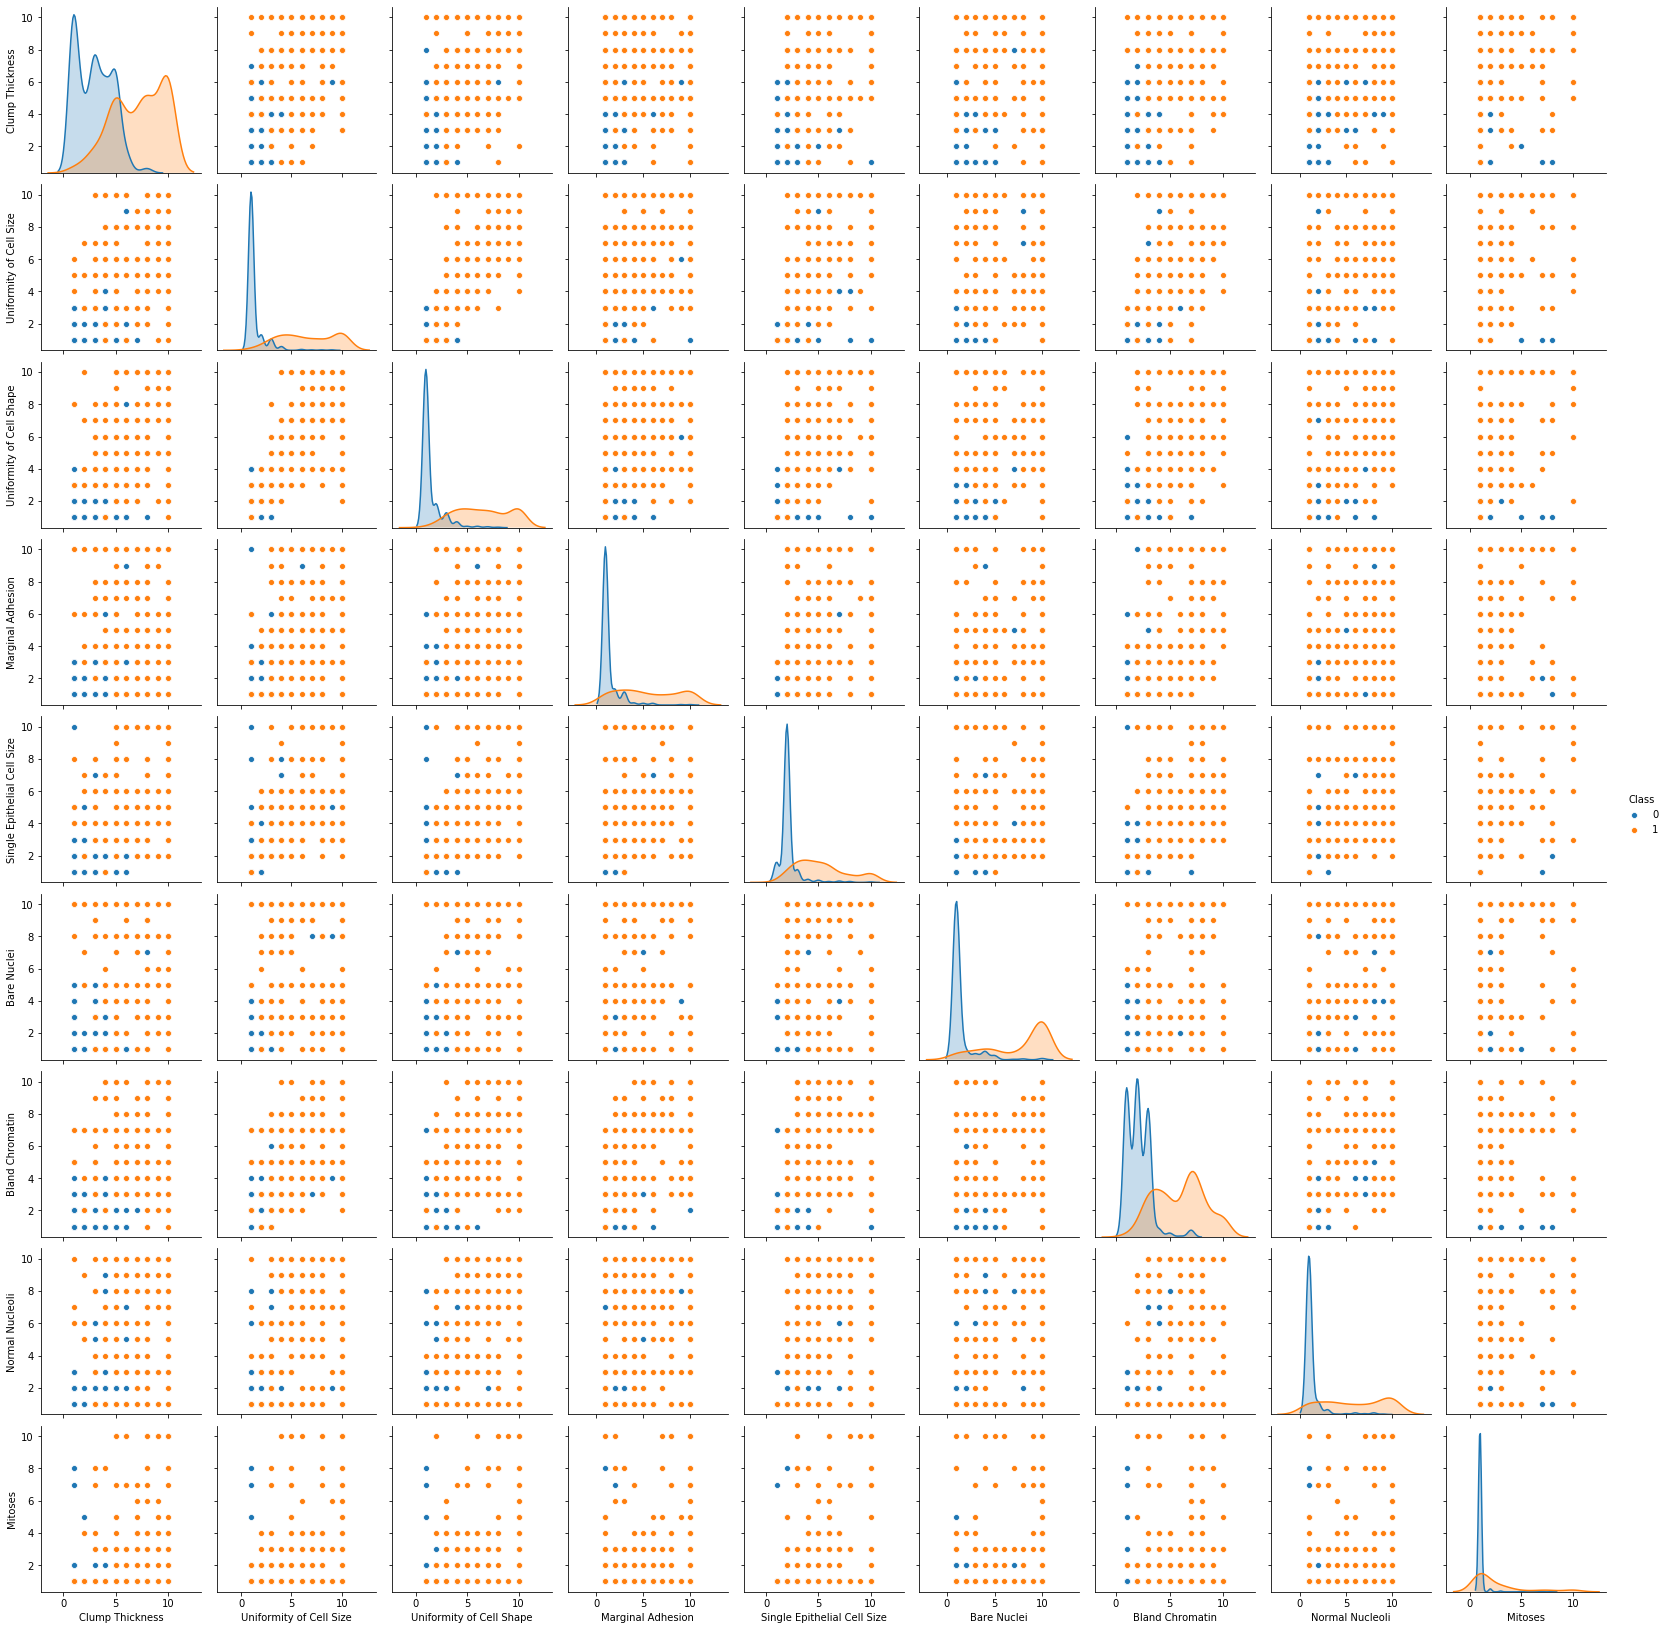

In [21]:
sns.distributions._has_statsmodels = False
sns.pairplot(data, hue='Class')

In [367]:
data[['Clump Thickness','Class']]

,Clump Thickness,Class
0,5,0
1,5,0
2,3,0
3,6,0
4,4,0
...,...,...
694,3,0
695,2,0
696,5,1
697,4,1


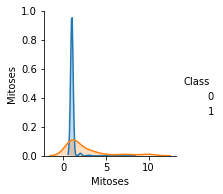

In [377]:
sns.pairplot(data[['Mitoses','Class']], hue='Class')

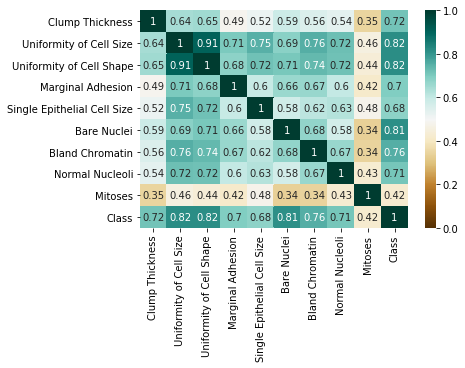

In [364]:
sns.heatmap(data.corr(), cmap="BrBG", annot=True, vmin=0, vmax=1)

# Splitting Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
82,5,2,1,1,2,1,3,1,1
51,5,3,3,4,2,4,3,4,1
220,1,1,1,2,2,1,3,1,1
559,5,1,1,1,2,1,2,1,1
544,2,1,3,2,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
71,6,10,2,8,10,2,7,8,10
106,10,10,10,8,2,10,4,1,1
270,8,4,7,1,3,10,3,9,2
435,10,8,10,1,3,10,5,1,1


In [23]:
column_names

['Sample code number',
 'Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

In [24]:

feature_names= column_names[1:-1]
feature_names

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

# Modelling

## Logistic Regression for Single Features

In [39]:
# Testign Single Features for Accuracy Scores Using Logistic Regression

scores=[]
for feature in feature_names:
    lm=LogisticRegression()
    lm.fit(X_train[[feature]], y_train)
    accuracy_sc=lm.score(X_test[[feature]],y_test)
    predictions=lm.predict(X_test[[feature]])
    precision_sc=precision_score(y_test, predictions)
    scores.append((feature,accuracy_sc, precision_sc))
    print(confusion_matrix(y_test, predictions), feature)
    

pd.DataFrame(scores, columns=['Features', 'Accuracy Score' , 'Precision Scores'])


[[95  0]
 [17 28]] Clump Thickness
[[93  2]
 [ 8 37]] Uniformity of Cell Size
[[91  4]
 [ 9 36]] Uniformity of Cell Shape
[[94  1]
 [13 32]] Marginal Adhesion
[[89  6]
 [16 29]] Single Epithelial Cell Size
[[93  2]
 [12 33]] Bare Nuclei
[[91  4]
 [11 34]] Bland Chromatin
[[90  5]
 [11 34]] Normal Nucleoli
[[92  3]
 [24 21]] Mitoses


,Features,Accuracy Score,Precision Scores
0,Clump Thickness,0.878571,1.000000
1,Uniformity of Cell Size,0.928571,0.948718
2,Uniformity of Cell Shape,0.907143,0.900000
3,Marginal Adhesion,0.900000,0.969697
4,Single Epithelial Cell Size,0.842857,0.828571
5,Bare Nuclei,0.900000,0.942857
6,Bland Chromatin,0.892857,0.894737
7,Normal Nucleoli,0.885714,0.871795
8,Mitoses,0.807143,0.875000


## Logistic Regression with All Features

In [163]:
lm_all=LogisticRegression(C=1)
lm_all.fit(X_train,y_train)
lm_all.score(X_test,y_test)

0.9571428571428572

In [164]:
predictions_all=lm_all.predict(X_test)
confusion_matrix(y_test, predictions)

array([[94,  1],
       [ 4, 41]])

In [165]:
precision_score(y_test, predictions_all)

0.975609756097561

In [166]:
recall_score(y_test, predictions_all)

0.8888888888888888

In [405]:
f1_score(y_test, predictions_all)

0.9302325581395349

In [167]:
lm_all.coef_

array([[ 0.53386377,  0.0046567 ,  0.41593535,  0.21623713,  0.11694847,
         0.42220455,  0.36921086, -0.01797218,  0.36176669]])

#### The accuracy and precision scores both increased significantly by taking all the features. 

# Fine Tuning the Logistic Regression Model for Hyperparameter - 'C'

In [292]:
from sklearn.model_selection import GridSearchCV

log_reg=LogisticRegression()

In [293]:
Cs= np.logspace(-3,3, num=7)
Cs

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [294]:
param_grid=dict(C=Cs)

In [295]:
lm_cv=GridSearchCV(log_reg, param_grid, cv=5)
lm_cv.fit(X_train,y_train)
print(lm_cv.best_score_)
print(lm_cv.best_params_)


0.9623873873873874
{'C': 0.1}


In [379]:
predictions_cv=lm_cv.predict(X_test)
cm_lm=confusion_matrix(y_test, predictions_cv)


Text(115.7222222222223, 0.5, 'Actual')

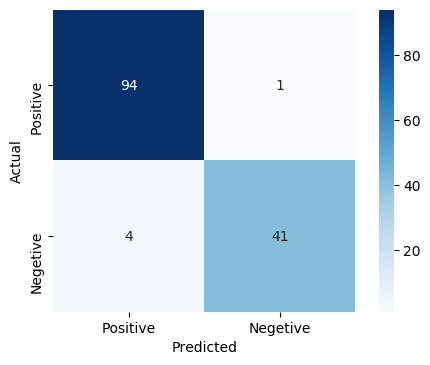

In [396]:
plt.figure(dpi=100)
sns.heatmap(cm_lm, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Positive','Negetive'],
           yticklabels=['Positive','Negetive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')


In [173]:
precision_score(y_test, predictions_cv)

0.9761904761904762

In [174]:
recall_score(y_test, predictions_cv)

0.9111111111111111

In [403]:
f1_score(y_test, predictions_cv)

0.9425287356321839

In [303]:
lm_cv.predict_proba(X_test)

array([[9.90922781e-01, 9.07721881e-03],
       [9.90145574e-01, 9.85442556e-03],
       [9.91570447e-01, 8.42955255e-03],
       [7.91255122e-02, 9.20874488e-01],
       [9.72487911e-01, 2.75120890e-02],
       [9.96695212e-01, 3.30478795e-03],
       [9.82907345e-01, 1.70926550e-02],
       [8.51754124e-03, 9.91482459e-01],
       [1.35661973e-02, 9.86433803e-01],
       [8.26608003e-01, 1.73391997e-01],
       [9.94718815e-01, 5.28118547e-03],
       [2.45311942e-01, 7.54688058e-01],
       [9.93822804e-01, 6.17719568e-03],
       [9.81403376e-01, 1.85966236e-02],
       [9.93822804e-01, 6.17719568e-03],
       [5.25256810e-04, 9.99474743e-01],
       [9.98230645e-01, 1.76935522e-03],
       [9.18670560e-04, 9.99081329e-01],
       [5.06066975e-02, 9.49393303e-01],
       [2.23549314e-01, 7.76450686e-01],
       [2.98657493e-05, 9.99970134e-01],
       [9.97860299e-01, 2.13970062e-03],
       [4.80034403e-01, 5.19965597e-01],
       [9.98230645e-01, 1.76935522e-03],
       [1.441047

# Precision and Recall Curve With Logistic Regression

In [305]:
lm_pr=LogisticRegression(C=0.1) # Selecting the hyperparameter that was the best in the previous step
lm_pr.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [316]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm_pr.predict_proba(X_test)[:,0])

len(threshold_curve)

111

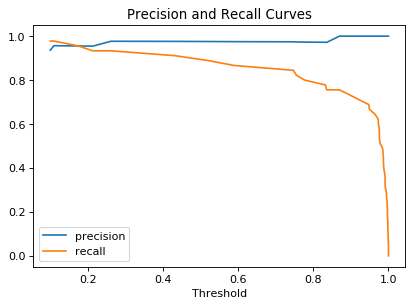

In [406]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm_pr.predict_proba(X_test)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

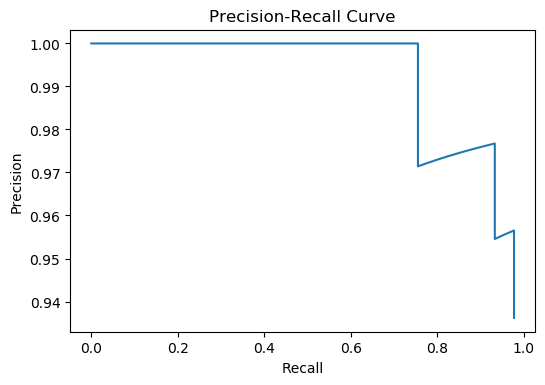

In [407]:
plt.figure(dpi=100)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

# Random Forest Ensemble Method

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [319]:
rf=RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [183]:

rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9642857142857143

In [184]:
predictions_rf=rf.predict(X_test)
confusion_matrix(y_test, predictions_rf)

array([[94,  1],
       [ 4, 41]])

In [185]:
precision_score(y_test, predictions_rf)

0.9761904761904762

In [186]:
recall_score(y_test, predictions_rf)

0.9111111111111111

In [404]:
f1_score(y_test, predictions_rf)

0.9425287356321839

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

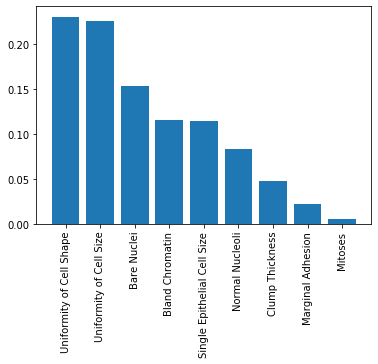

In [393]:
from matplotlib import pyplot

feature_imp=[[importance[i],feature_names[i]] for i in range(9)]
sorted_feature_imp=sorted(feature_imp, reverse=True)
sorted_importance=[]
sorted_feature_names=[]
for pair in sorted_feature_imp:
    sorted_importance.append(pair[0])
    sorted_feature_names.append(pair[1])
pyplot.bar(sorted_feature_names,sorted_importance)
plt.xticks(rotation=90)

# Simplifying the model by Feature Reduction

#### From the pairplot we can see that a few features are correlated and we can try to run our model by removing these features and see if we get similar results

In [119]:
X_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
82,5,2,1,1,2,1,3,1,1
51,5,3,3,4,2,4,3,4,1
220,1,1,1,2,2,1,3,1,1
559,5,1,1,1,2,1,2,1,1
544,2,1,3,2,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
71,6,10,2,8,10,2,7,8,10
106,10,10,10,8,2,10,4,1,1
270,8,4,7,1,3,10,3,9,2
435,10,8,10,1,3,10,5,1,1


In [243]:
X_train_fe1=X_train.drop(['Uniformity of Cell Size', 'Mitoses'], axis=1)


In [244]:
X_test_fe1=X_test.drop(['Uniformity of Cell Size', 'Mitoses'], axis=1)

In [245]:
lm_fe1=LogisticRegression(C=0.1)
lm_fe1.fit(X_train_fe1,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [246]:
lm_fe1.score(X_test_fe1,y_test)

0.9642857142857143

In [247]:
predictions_fe1=lm_fe1.predict(X_test_fe1)
confusion_matrix(y_test, predictions_fe1)

array([[94,  1],
       [ 4, 41]])

In [248]:
precision_score(y_test, predictions_fe1)

0.9761904761904762

In [249]:
recall_score(y_test, predictions_fe1)

0.9111111111111111

# Random Forest with Feature Reduction

In [400]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [251]:
rf_fe1=RandomForestClassifier()
rf_fe1.fit(X_train_fe1,y_train)
rf_fe1.score(X_test_fe1,y_test)

0.9714285714285714

In [397]:
predictions_rf_fe1=rf_fe1.predict(X_test_fe1)
cm_rf=confusion_matrix(y_test, predictions_rf_fe1)

Text(115.7222222222223, 0.5, 'Actual')

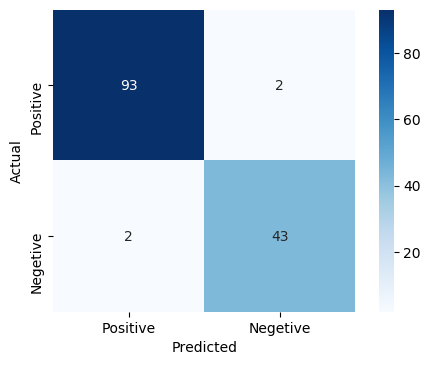

In [398]:
plt.figure(dpi=100)
sns.heatmap(cm_rf, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Positive','Negetive'],
           yticklabels=['Positive','Negetive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

In [253]:
precision_score(y_test, predictions_rf_fe1)

0.9555555555555556

In [254]:
recall_score(y_test, predictions_rf_fe1)

0.9555555555555556

In [401]:
f1_score(y_test, predictions_rf_fe1)

0.9555555555555556

In [229]:
X_train_fe1

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
82,5,1,1,2,1,3,1
51,5,3,4,2,4,3,4
220,1,1,2,2,1,3,1
559,5,1,1,2,1,2,1
544,2,3,2,2,1,2,1
...,...,...,...,...,...,...,...
71,6,2,8,10,2,7,8
106,10,10,8,2,10,4,1
270,8,7,1,3,10,3,9
435,10,10,1,3,10,5,1


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

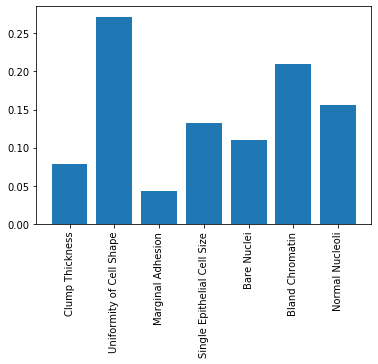

In [399]:
importance_fe1=rf_fe1.feature_importances_
pyplot.bar(X_train_fe1.columns,importance_fe1)
plt.xticks(rotation=90)

# Hyperparameter Tuning for Random Forest

In [336]:
rf=RandomForestClassifier()
max_depths=[1,2,3,4,5,6,7,8,9,10]
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [337]:
n_est=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
n_est

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200]

In [338]:
param_grid={'max_depth':max_depths, 'n_estimators': n_est}

In [340]:
rf_cv=GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_fe1,y_train)
print(rf_cv.best_score_)
print(rf_cv.best_params_)

0.9713320463320463
{'max_depth': 4, 'n_estimators': 130}


# ROC Curve

In [358]:
from sklearn.metrics import roc_auc_score, roc_curve

lm_fpr_all, lm_tpr_all, thresholds = roc_curve(y_test, lm_all.predict_proba(X_test)[:,1])
lm_fpr, lm_tpr, thresholds = roc_curve(y_test, lm_fe1.predict_proba(X_test_fe1)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_fe1.predict_proba(X_test_fe1)[:,1])

ROC AUC score (lm_all)=  0.9967251461988305
ROC AUC score (lm_fe1)=  0.9964912280701754
ROC AUC score (rf_fe1)=  0.9962573099415205


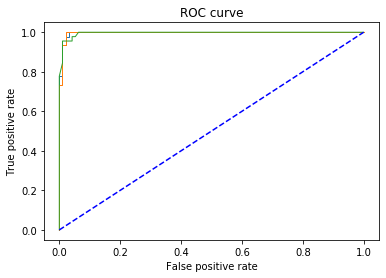

In [412]:
plt.plot(lm_fpr_all, lm_tpr_all,lw=1)
plt.plot(lm_fpr, lm_tpr,lw=1)
plt.plot(rf_fpr, rf_tpr,lw=1)
plt.plot([0,1],[0,1],c='blue',ls='--')


plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score (lm_all)= ", roc_auc_score(y_test, lm_all.predict_proba(X_test)[:,1]))
print("ROC AUC score (lm_fe1)= ", roc_auc_score(y_test, lm_fe1.predict_proba(X_test_fe1)[:,1]))
print("ROC AUC score (rf_fe1)= ", roc_auc_score(y_test, rf_fe1.predict_proba(X_test_fe1)[:,1]))
